In [144]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime


In [145]:
df = pd.read_csv("./cook.csv", header=0)

In [146]:
# Processing 

def getDate(row):
    return datetime.datetime.strptime(row["Date of Incident"], "%m/%d/%y %H:%M")

#  Add date 
df['Date'] = df.apply (lambda row: getDate(row), axis=1)

# exclude data before January 6th which is the first Monday => Sunday period of 2019
startDate = datetime.datetime(2019, 1, 7, 0, 0)
dfStart = df[df['Date'] > startDate]

# Exclude data after March 22, which is the last Monday => Sunday period of 2020 
endDate = datetime.datetime(2020, 3, 22, 23, 59)
dfSpan = dfStart[dfStart['Date'] <= endDate]


# want to add a column for weeks since start date
def getDaysSinceStart(row):
    return round ((row["Date"] - startDate).days / 7)

dfSpan['WeekNumber'] = dfSpan.apply (lambda row: getDaysSinceStart(row), axis=1)

In [147]:
# add data from year before
dfByWeek = dfSpan.groupby("WeekNumber").size().reset_index(name='Number of Incidents')
def getYearBeforeAmt(row):
    if row["WeekNumber"] >= 52:
        return dfByWeek.iloc[row["WeekNumber"] - 52]["Number of Incidents"]
    return None
dfByWeek['YearBefore'] = dfByWeek.apply (lambda row: getYearBeforeAmt(row), axis=1)


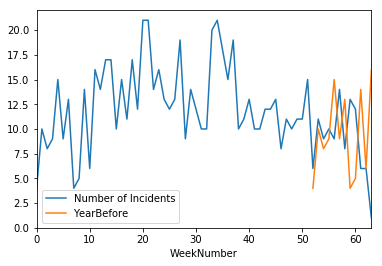

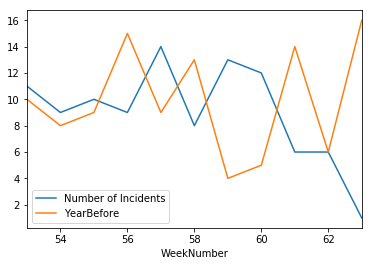

In [148]:
dfByWeek.plot("WeekNumber")
dfByWeek[dfByWeek["WeekNumber"] > 52].plot("WeekNumber")

In [149]:
def getStartDate(row):
    return datetime.timedelta(weeks=row["WeekNumber"]) + startDate
dfByWeek['StartingWeek'] = dfByWeek.apply (lambda row: getStartDate(row), axis=1)

dfByWeek

,WeekNumber,Number of Incidents,YearBefore,StartingWeek
0,0,4,NaN,2019-01-07
1,1,10,NaN,2019-01-14
2,2,8,NaN,2019-01-21
3,3,9,NaN,2019-01-28
4,4,15,NaN,2019-02-04
5,5,9,NaN,2019-02-11
6,6,13,NaN,2019-02-18
7,7,4,NaN,2019-02-25
8,8,5,NaN,2019-03-04
9,9,14,NaN,2019-03-11
